In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
data = pd.read_csv("heart.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
y =data.target.values
x1=data.drop(["target"],axis=1)
x = (x1 - np.min(x1))/(np.max(x1)-np.min(x1)).values


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)
xtrain = xtrain.T
xtest = xtest.T
ytrain = ytrain.T
ytest = ytest.T

In [ ]:
def initializing_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b
def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [ ]:
def forward_backwardpropogation(w,b,xtrain,y_train):
    z = np.dot(w.T,xtrain) +  b 
    y_head = sigmoid(z)
    loss = -ytrain*np.log(y_head)-(1-ytrain)*np.log(1-y_head)
    cost = (np.sum(loss))/xtrain.shape[1]
    derivative_weight = (np.dot(xtrain,((y_head-ytrain).T)))/xtrain.shape[1] 
    derivetive_bias = np.sum(y_head-ytrain)/xtrain.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivetive_bias": derivetive_bias}
    
    return cost,gradients

In [ ]:
def update(w,b,xtrain, ytrain, learning_rate, number_of_iteration):
    costlist = []
    costlist2 = []
    index = []
    for i in range(number_of_iteration):
        cost,gradients = forward_backwardpropogation(w,b,xtrain,ytrain)
        costlist.append(cost)
        w = w - learning_rate*gradients["derivative_weight"]
        b = b - learning_rate*gradients["derivetive_bias"]
        if i % 10 == 0:
            costlist2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i,cost))
    parameters = {"weight": w, "bias":b}
    plt.plot(index,costlist2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, costlist

In [ ]:
def predict(w,b,xtest):
    
    z =sigmoid(np.dot(w.T,xtest)+b)
    y_prediction = np.zeros((1,xtest.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<=0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [ ]:
def LogReg(xtrain,ytrain,xtest,ytest,learning_rate,number_of_iteration):
    dimension = xtrain.shape[0] 
    w,b=initializing_weights_and_bias(dimension)
    parameters,gradients,costlist = update(w,b,xtrain,ytrain,learning_rate,number_of_iteration)
    y_prediciton_test = predict(parameters["weight"],parameters["bias"],xtest)
    print("Test Accuracy:{} %".format(100-np.mean(np.abs(y_prediciton_test-ytest))*100))


Cost after iteration 0: 0.692516
Cost after iteration 10: 0.522652
Cost after iteration 20: 0.464812
Cost after iteration 30: 0.436631
Cost after iteration 40: 0.419664
Cost after iteration 50: 0.408136
Cost after iteration 60: 0.399711
Cost after iteration 70: 0.393253
Cost after iteration 80: 0.388134
Cost after iteration 90: 0.383976


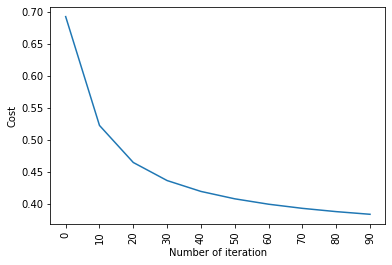

Test Accuracy:85.24590163934427 %


In [ ]:
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=1,number_of_iteration =100 )

In [ ]:





from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain.T,ytrain.T)
print("Test Accuracy {}".format(LR.score(xtest.T,ytest.T))) 

Test Accuracy 0.8524590163934426


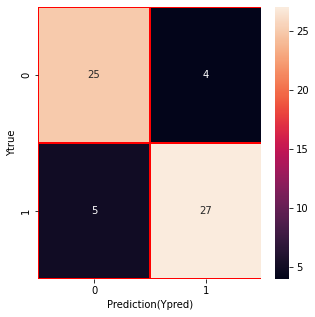

In [ ]:
#Confusion Matrix

yprediciton= LR.predict(xtest.T)
ytrue = ytest.T

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()